<a href="https://colab.research.google.com/github/RMoulla/Machine-learning/blob/main/TP_Node_Embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP : Réseaux de neurones graphiques.

Dans ce TP, on va appliquer les concepts d'extraction de caractéristiques et de node embedding vus en cours sur un dataset classique [Karate Club Network](https://en.wikipedia.org/wiki/Zachary%27s_karate_club).



**Les objectifs sont :**
1. **Extraction de Caractéristiques :** Nous allons commencer par appliquer des méthodes d'extraction de caractéristiques sur le réseau du Karate Club. Ces méthodes nous permettront de représenter les nœuds du réseau et de chercher à mieux comprendre le dataset. C'est dans cette session que nous examinerons la structure du réseau, identifiant les nœuds et les arêtes.

2. **Node Embedding :** En utilisant des techniques d'intégration de nœuds (node embedding), nous allons projeter les nœuds du réseau dans un espace vectoriel de dimension réduite. Cela facilitera la visualisation et l'analyse des relations entre les nœuds.

3. **Stochastic Gradient Descent (SGD) :** Dans la suite du TP, nous aborderons l'optimisation des modèles en utilisant la descente de gradient stochastique (SGD). Nous appliquerons cette technique pour affiner nos résultats de node embedding et améliorer la performance globale de notre modèle.

4. **Clustering Spectral :** Nous introduirons ensuite le concept de clustering spectral, une technique de regroupement des nœuds du réseau basée sur les propriétés spectrales de la matrice d'adjacence. Cette approche nous permettra d'identifier des groupes de nœuds fortement connectés afin de mettre en évidence la structure communautaire du réseau.

# Représentation graphique avec networkx


In [ ]:
import networkx as nx

## Zachary's karate club network

Zachary's karate club est un graphe décrivant un réseau social de 34 membres d'un club de karaté. Les liens représentent les interactions entre les membres en dehors du club.

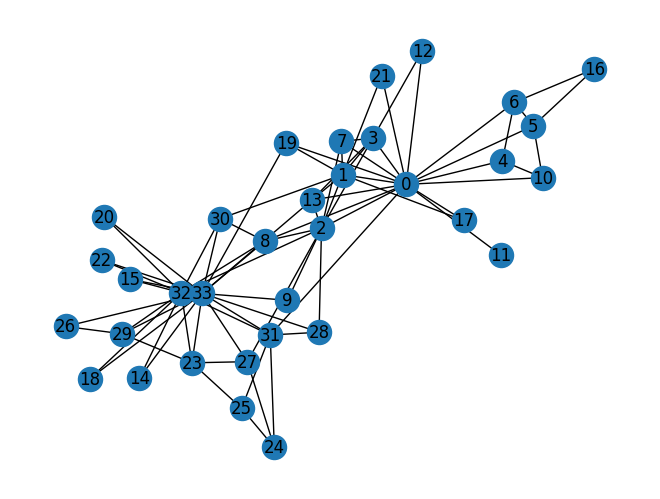

In [ ]:
G = nx.karate_club_graph()

nx.draw(G, with_labels = True)

Il s'agit d'un graphe connexe de 34 noeuds numérotés de "0" à "33".

In [ ]:
def average_degree(num_edges, num_nodes):
  myn = 2 * num_edges / num_nodes
  deg_moyen = round(myn)

  return deg_moyen

num_edges = G.number_of_edges()
num_nodes = G.number_of_nodes()
deg_moyen = average_degree(num_edges, num_nodes)
print(" Le degré moyen du dataset du club de karaté est : {}".format(deg_moyen))

 Le degré moyen du dataset du club de karaté est : 5


La fonction ci-dessus calcule le degré moyen du graphe. Le degré moyen représente le nombre moyen d'arêtes connectées à chaque nœud du graphe. C'est une mesure importante pour comprendre la connectivité globale d'un graphe.

Il est de 5 dans notre graphe. En d'autres termes, dans ce graphe, chaque noeud est connecté en moyenne à 5 autres.

In [ ]:
def average_clustering_coefficient(G):

    avg_cluster_coef = 0
    avg_cluster_coef = nx.average_clustering(G)
    avg_cluster_coef = round(avg_cluster_coef, 2)

    return avg_cluster_coef

avg_cluster_coef = average_clustering_coefficient(G)
print("Average clustering coefficient of karate club network is {}".format(avg_cluster_coef))

Average clustering coefficient of karate club network is 0.57


Le coefficient de regroupement moyen du réseau du club de karaté est de 0.57.
Il mesure à quel point les nœuds d'un graphe sont regroupés en cliques ou en clusters. La valeur de 0.57 suggère que le réseau du club de karaté a une tendance à la formation de clusters, avec des groupes de nœuds fortement connectés entre eux.

In [ ]:
def closeness_centrality(G, node):

    closeness = 0
    path_length_total = 0
    for path in list(nx.single_source_shortest_path(G,node).values())[1:]:
        path_length_total += len(path)-1

    closeness = 1 / path_length_total
    closeness = round(closeness, 2)

    return closeness

node = 13
closeness = closeness_centrality(G, node=node)
print("La centralité de proximité du nœud 13 dans le réseau du club de karaté est de {}".format(closeness))

node = 5
closeness = closeness_centrality(G, node=node)
print("La centralité de proximité du nœud 5 dans le réseau du club de karaté est de {}".format(closeness))

La centralité de proximité du nœud 13 dans le réseau du club de karaté est de 0.02
La centralité de proximité du nœud 5 dans le réseau du club de karaté est de 0.01


D'après le résultat imprimé, la centralité de proximité du nœud 5 dans le réseau du club de karaté est de 0.01. Et celle du nœud 13 est de 0.02

La centralité de proximité mesure la proximité d'un nœud par rapport à tous les autres nœuds du graphe en termes de longueur des chemins les plus courts. Un nœud avec une centralité de proximité élevée est considéré donc comme "central" dans le réseau. Dans ce cas spécifique, le nœud "13" est bien plus central que le nœud "5". Autrement, le nœud "5" est relativement plus éloigné des autres nœuds dans le réseau du club de karaté que le nœud "13".

# Graphe en Tenseur
Ayant une idée du graphe, passons à sa représentation.

Nous allons transformer le graphe $G$ en tenseur Pytorch.

In [ ]:
import torch

## Liste des arêtes positives du Karaté club en format `torch.LongTensor`.

In [ ]:
def graph_to_edge_list(G):

  # Cette fonction retourne la liste des arêtes d'un graphe sous forme
  # de couplet composé de deux noeuds.

  edge_list = []

  ############# Code ############
  edge_list = []

  for edge in G.edges():
    edge_list.append(edge)
  #########################################
  return edge_list

def edge_list_to_tensor(edge_list):

  # Cette fonction transforme un liste d'arêtes en Tenseur Pytorch
  # de dimension [2 x len(edge_list)]

  edge_index = torch.tensor([])

  ############# Code ############
  edge_index = torch.tensor(edge_list, dtype=torch.long).t().contiguous()
  #########################################

  return edge_index

pos_edge_list = graph_to_edge_list(G)
# print(pos_edge_list)
pos_edge_index = edge_list_to_tensor(pos_edge_list)
print("La dimension de pos_edge_index est : {}".format(pos_edge_index.shape))
print("La somme des valeurs de os_edge_index : {}".format(torch.sum(pos_edge_index)))

La dimension de pos_edge_index est : torch.Size([2, 78])
La somme des valeurs de os_edge_index : 2535


In [ ]:
pos_edge_list

[(0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (0, 10),
 (0, 11),
 (0, 12),
 (0, 13),
 (0, 17),
 (0, 19),
 (0, 21),
 (0, 31),
 (1, 2),
 (1, 3),
 (1, 7),
 (1, 13),
 (1, 17),
 (1, 19),
 (1, 21),
 (1, 30),
 (2, 3),
 (2, 7),
 (2, 8),
 (2, 9),
 (2, 13),
 (2, 27),
 (2, 28),
 (2, 32),
 (3, 7),
 (3, 12),
 (3, 13),
 (4, 6),
 (4, 10),
 (5, 6),
 (5, 10),
 (5, 16),
 (6, 16),
 (8, 30),
 (8, 32),
 (8, 33),
 (9, 33),
 (13, 33),
 (14, 32),
 (14, 33),
 (15, 32),
 (15, 33),
 (18, 32),
 (18, 33),
 (19, 33),
 (20, 32),
 (20, 33),
 (22, 32),
 (22, 33),
 (23, 25),
 (23, 27),
 (23, 29),
 (23, 32),
 (23, 33),
 (24, 25),
 (24, 27),
 (24, 31),
 (25, 31),
 (26, 29),
 (26, 33),
 (27, 33),
 (28, 31),
 (28, 33),
 (29, 32),
 (29, 33),
 (30, 32),
 (30, 33),
 (31, 32),
 (31, 33),
 (32, 33)]

Il existe dans le graphe 78 arrêtes qui sont représentées par les couples de noeuds ci-dessus



## Liste des arêtes négatives.

In [ ]:
import random


def sample_negative_edges(G, num_neg_samples):

  # Cette fonction retourne la liste des arêtes négatives.
  #Il s'agit des arêtes qui n'existent pas. Un couple de noeuds qui ne sont pas connecté

  neg_edge_list = []

  ############# Code ############
  while len(neg_edge_list) < num_neg_samples:
    number_one = random.randint(1, 32)
    number_two = random.randint(number_one+1, 33)
    not_edge = (number_one, number_two)
    if ((not_edge not in G.edges() ) and (not_edge not in neg_edge_list)):
      neg_edge_list.append(not_edge)


  ###############################

  return neg_edge_list

# Echantillon de 78 arêtes négatives
neg_edge_list = sample_negative_edges(G, len(pos_edge_list))

# Convertir la liste des arêtes négatives en tenseur
neg_edge_index = edge_list_to_tensor(neg_edge_list)
print("Le tenseur neg_edge_index est de dimension {}".format(neg_edge_index.shape))

Le tenseur neg_edge_index est de dimension torch.Size([2, 78])


In [ ]:
len(neg_edge_list)

78

Les arrêtes négatives sont simplement les non arrêtes. C'est à dire des arrêtes qui n'existent pas dans le graphe.

Dans le domaine de l'apprentissage de graphes, l'utilisation d'arêtes négatives peut être importante pour l'apprentissage de modèles de liens entre les nœuds.

# Node Embeddings

Les embeddings de nœuds (node embeddings) sont des représentations vectorielles d'un nœud dans un graphe. Ces représentations sont généralement des vecteurs numériques compacts qui capturent certaines caractéristiques structurelles et sémantiques du nœud dans le contexte du graphe. L'idée fondamentale derrière les embeddings de nœuds est de projeter chaque nœud dans un espace vectoriel de manière à ce que des nœuds similaires ou liés aient des embeddings similaires. Nous utiliserons ce concept pour tenter de représenter les relations entre les membres du club de karaté.

Nous commencerons par quelques exemples.

In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

On va utiliser ici le module [`nn.Embedding`](https://pytorch.org/docs/stable/generated/torch.nn.Embedding.html) de PyTorch.

In [ ]:
# Initialisation de la couche d'embeddings
# avec, par exemple, 4 objets de dimension 8 chacun

emb_sample = nn.Embedding(num_embeddings=4, embedding_dim=8)
print('Embedding layer: {}'.format(emb_sample))

Embedding layer: Embedding(4, 8)


On peut sélectionner l'embedding d'un objet en utilisant l'indice correspondant.

In [ ]:
# Sélectionner un seul embedding
id = torch.LongTensor([1])
print(emb_sample(id))
print('-' * 40)

# Sélectionner plusieurs embeddings
ids = torch.LongTensor([1, 3])
print(emb_sample(ids))
print('-' * 40)

# Obtenir la dimension de la mtrice de poids de l'embedding
shape = emb_sample.weight.data.shape
print(shape)
print('-' * 40)


# Affecter de nouvelles valeurs à la matrice de poids (ici des 1)
emb_sample.weight.data = torch.ones(shape)

# Vérifier la nouvelle affectation
ids = torch.LongTensor([0, 3])
print(emb_sample(ids))
print('-' * 40)

tensor([[-2.2332, -0.1705,  0.2099,  0.9132, -0.7901,  0.1273, -0.5981,  1.2126]],
       grad_fn=<EmbeddingBackward0>)
----------------------------------------
tensor([[-2.2332, -0.1705,  0.2099,  0.9132, -0.7901,  0.1273, -0.5981,  1.2126],
        [-0.6047, -0.1277,  0.2469, -0.0160,  1.0806, -0.0872, -0.2299,  0.1485]],
       grad_fn=<EmbeddingBackward0>)
----------------------------------------
torch.Size([4, 8])
----------------------------------------
tensor([[1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.]], grad_fn=<EmbeddingBackward0>)
----------------------------------------


Après les exemples, on va appliquer à cela au jeu de données Zachary's karaté club.


*   On veut associer un vecteur de dimension 16 à chaque noeud du graphe.
*   on veut initialiser la matrice avec une distribution uniforme dans $[0, 1]$ en utilisant [`torch.rand`](https://pytorch.org/docs/stable/generated/torch.rand.html).



In [ ]:
torch.manual_seed(1)

def create_node_emb(num_node=34, embedding_dim=16):

  # Ecrire une fonction qui implémente la matrice d'embeddings pour les noeuds.
  # La fonction doit retourner un embedding de format torch.nn initalisé selon
  # une loi uniforme dans [0,1].

  emb = None

  ############# Code ############
  emb = nn.Embedding(num_embeddings=num_node, embedding_dim=embedding_dim)
  shape = emb.weight.data.shape
  emb.weight.data = torch.rand(shape)
  ###############################

  return emb

emb = create_node_emb()
ids = torch.LongTensor([0, 3])

print("Embedding: {}".format(emb))

print(emb(ids))

Embedding: Embedding(34, 16)
tensor([[0.2114, 0.7335, 0.1433, 0.9647, 0.2933, 0.7951, 0.5170, 0.2801, 0.8339,
         0.1185, 0.2355, 0.5599, 0.8966, 0.2858, 0.1955, 0.1808],
        [0.7486, 0.6546, 0.3843, 0.9820, 0.6012, 0.3710, 0.4929, 0.9915, 0.8358,
         0.4629, 0.9902, 0.7196, 0.2338, 0.0450, 0.7906, 0.9689]],
       grad_fn=<EmbeddingBackward0>)


## Visualisation des embeddings

Nous allons projet les embeddings inialisés ci-dessous en deux dimensions afin de les visualiser.

In [ ]:
G.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33))

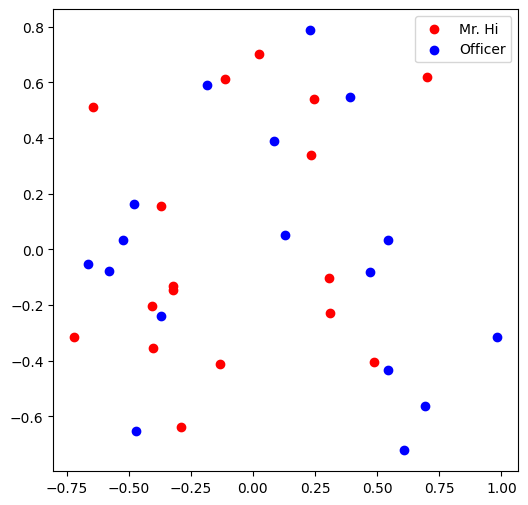

In [ ]:
def visualize_emb(emb):
  #Cette fonction permet de visualiser les embeddings
  X = emb.weight.data.numpy()
  pca = PCA(n_components=2)
  components = pca.fit_transform(X)
  plt.figure(figsize=(6, 6))
  club1_x = []
  club1_y = []
  club2_x = []
  club2_y = []
  for node in G.nodes(data=True):
    if node[1]['club'] == 'Mr. Hi':
      club1_x.append(components[node[0]][0])
      club1_y.append(components[node[0]][1])
    else:
      club2_x.append(components[node[0]][0])
      club2_y.append(components[node[0]][1])
  plt.scatter(club1_x, club1_y, color="red", label="Mr. Hi")
  plt.scatter(club2_x, club2_y, color="blue", label="Officer")
  plt.legend()
  plt.show()

visualize_emb(emb)

Le code utilise une matrice d'embedding pour représenter chaque nœud du graphe dans un espace vectoriel. La visualisation permet de voir comment les nœuds se regroupent dans l'espace d'embedding, en particulier en fonction de l'appartenance à différents clubs. Les adeptes de  "Mr. Hi" sont ainsi représents en rouge tandis que ceux de "Officer" sont représentés en bleu.
L'utilisation de la PCA pour réduire la dimension permet de visualiser les embeddings en deux dimensions. Cette visualisation ne permet pas de remarquer un regroupement particulier dans le schéma d'appartenance. Nous allons donc entrainer un modèle afin de mieux comprendre les schéma d'appartenance aux catégories citées précédemment.

# Calcul des embeddings par descente du gradient.

In [ ]:
from torch.optim import SGD

def accuracy(pred, label):
  # Cette fonction prend les prédictions réalisées,
  # les arrondit et calcul la précision du modèle.

  accu = 0.0
  accu = torch.sum(torch.round(pred) == label) / pred.shape[0]

  return accu

def train(emb, loss_fn, sigmoid, train_label, train_edge):
  # Cette fonction entraîne les embeddings par SGD.
  # A faire :
  # 1 : récupérer les embeddings respectifs des noeuds à partir de train_edge
  # 2 : Calculer le produit scalaire des embeddings de chaque paire de noeuds
  # 3 : Appliquer une fonction sigmoïde au produit scalaire calculé
  # 4 : Appliquer la loss_fn au résultat de la fonction sigmoïde
  # 5 : Imprimer la fonction loss et la précision à chaque epoch.
  # (as a sanity check, the loss should decrease during training)


  epochs = 500
  learning_rate = 0.1

  optimizer = SGD(emb.parameters(), lr=learning_rate, momentum=0.9)

  for i in range(epochs):

    optimizer.zero_grad()

    ############# Code ###########

    # 1 : récupérer les embeddings respectifs des noeuds à partir de train_edge
    embeddings = emb(train_edge)



    # 2 : Calculer le produit scalaire des embeddings de chaque paire de noeuds
    dot_product = torch.sum(embeddings[0] * embeddings[1], -1)

    # 3 : Appliquer une fonction sigmoïde au produit scalaire calculé
    pred = sigmoid(dot_product)

    # 4 : Appliquer la loss_fn au résultat de la fonction sigmoïde
    loss = loss_fn(pred, train_label)

    # 5 : Imprimer la fonction loss et la précision à chaque epoch
    if i % 10 == 0:
        accu = accuracy(pred, train_label)
        print(f"Epoch {i}, Loss: {loss.item()}, Accuracy: {accu.item()}")
    loss.backward()
    optimizer.step()


    ##############################

# Définir la fonction de perte, la fonction sigmoïde et appeler la fonction d'entraînement
loss_fn = nn.BCELoss()
sigmoid = nn.Sigmoid()


# Générer les labels positifs et négatifs
pos_label = torch.ones(pos_edge_index.shape[1], )
neg_label = torch.zeros(neg_edge_index.shape[1], )

# Concaténer les labels positifs and négatifs dans le même tenseur
train_label = torch.cat([pos_label, neg_label], dim=0)


train_edge = torch.cat([pos_edge_index, neg_edge_index], dim=1)

train(emb, loss_fn, sigmoid, train_label, train_edge)

Epoch 0, Loss: 1.9491127729415894, Accuracy: 0.5
Epoch 10, Loss: 1.4317950010299683, Accuracy: 0.5
Epoch 20, Loss: 0.8299935460090637, Accuracy: 0.5128205418586731
Epoch 30, Loss: 0.5572601556777954, Accuracy: 0.6602563858032227
Epoch 40, Loss: 0.4579862952232361, Accuracy: 0.8269230723381042
Epoch 50, Loss: 0.40770652890205383, Accuracy: 0.9038461446762085
Epoch 60, Loss: 0.3689943552017212, Accuracy: 0.9230769276618958
Epoch 70, Loss: 0.3343736231327057, Accuracy: 0.9551281929016113
Epoch 80, Loss: 0.302935928106308, Accuracy: 0.9551281929016113
Epoch 90, Loss: 0.27455103397369385, Accuracy: 0.9615384340286255
Epoch 100, Loss: 0.2489926517009735, Accuracy: 0.9679487347602844
Epoch 110, Loss: 0.22597797214984894, Accuracy: 0.9743589758872986
Epoch 120, Loss: 0.2052411288022995, Accuracy: 0.9807692170143127
Epoch 130, Loss: 0.18655359745025635, Accuracy: 0.9935897588729858
Epoch 140, Loss: 0.16972005367279053, Accuracy: 1.0
Epoch 150, Loss: 0.15456998348236084, Accuracy: 1.0
Epoch 160,

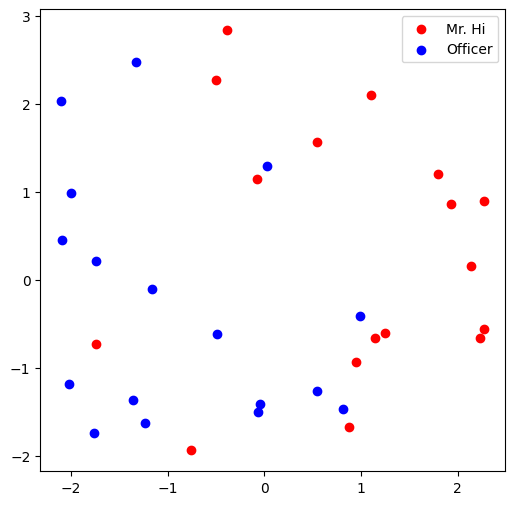

In [ ]:
# Visualisation des embeddings calculés
visualize_emb(emb)

Contrairement à la représentation précédente, celle du modèle entrainée ci-haut permet de remarquer une trend dans la représentation des noeuds. Les noeuds en rouge et ceux en bleu sont désormais mieux groupés. Le modèle détecte mieux les caractéristiques similaires des noeuds qui appartiennent à une même classe et propose une embedding plus pertient. On remarque quand même que certains points ne semblent pas si bien classés.

# Clustering spectrale

Enfin, nous allons représenter les données sous forme de graphe, puis d'utiliser les propriétés spectrales du graphe pour effectuer le regroupement. Cela facilitera la compréhension des relations entre les membres du club et permettra de mieux visualiser les liens entre eux.

In [ ]:
! pip install scikit-learn

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(


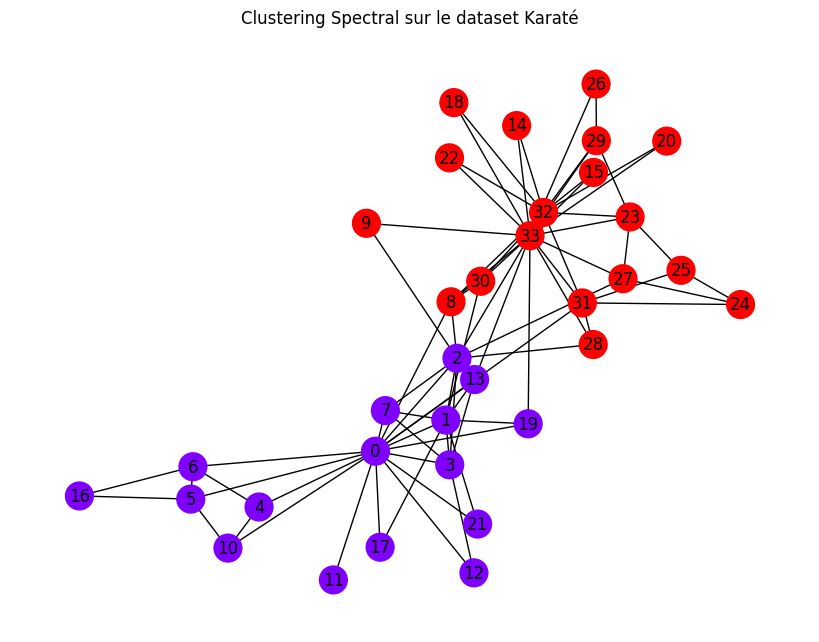

In [ ]:
import networkx as nx
import numpy as np
from sklearn.cluster import SpectralClustering
import matplotlib.pyplot as plt
from networkx.linalg.graphmatrix import adjacency_matrix

# Charger le dataset de karaté
G = nx.karate_club_graph()

# Obtenir la matrice d'adjacence du graphe
adj_matrix = adjacency_matrix(G)

# Convertir la matrice d'adjacence en format numpy
adjacency_matrix = np.array(adj_matrix.todense())

# Appliquer le clustering spectral
num_clusters = 2  # Vous pouvez ajuster ce paramètre en fonction du nombre de clusters souhaité
spectral = SpectralClustering(n_clusters=num_clusters, affinity='nearest_neighbors', random_state=42)
labels = spectral.fit_predict(adjacency_matrix)

# Visualiser le résultat du clustering
pos = nx.spring_layout(G)
colors = np.array(labels)

plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, node_color=colors, cmap=plt.cm.rainbow, node_size=400)
plt.title("Clustering Spectral sur le dataset Karaté")
plt.show()


Le résultat de ce code est la représentation du réseau du club de karaté avec l'ajout aux noeuds d'une couleur représentant l'appartenance du noeud. Le réseau est divisé en 2 clusters. Les noeuds ayant des propriétés similaires sont regroupés donc dans le même cluster. En comparaison au premier graphe représenté, cette catégorisation semble pertinente et en concordance avec les arrêtes et avec la classification obtenue avec les embedding.


Ce TP nous a fourni une expérience pratique sur l'application des concepts d'extraction de caractéristiques, de node embedding, de clustering spectral, et de SGD sur un cas d'étude réel, le réseau du Karate Club. Il nous a permis d'acquérir une compréhension plus ou moins bonnne de ces techniques et de leur application dans le contexte de l'analyse d'un graphe.